In [1]:
#EM Algorithm 구현 

$N(x|\mu,\sigma^2) = \frac{1}{\sqrt{2\pi\sigma^2}}exp[-\frac{(x-\mu)^2}{2\sigma^2}]$

In [31]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

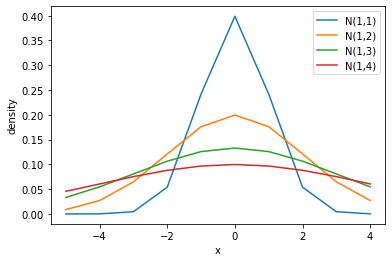

In [32]:
#gaussian 공식을 사용해서 그냥 plot해보는 방법 
x = np.arange(-5,5-0.01)
def gaussian(x,mean,sigma):
    return (1/np.sqrt(2*np.pi*sigma**2)*np.exp(-(x-mean)**2/(2*sigma**2)))

legend = [] 
gaussian(x,0,1)
for i in range(1,5):
    legend.append(f'N(1,{i})')
    plt.plot(x,gaussian(x,0,i))
plt.xlabel('x')
plt.ylabel('density')
plt.legend(legend)
plt.show()

In [33]:
data = np.random.randn(100)*1+0

In [4]:
# # fig = plt.figure()
# fig,axes = plt.subplots(2,2)
# axes[0].set_xlim(-50,50)
# # fig.set_xlim(-50,50)
# # fig.ylim(-50,50)
# # ax1 = fig.add_subplot(2, 2, 1)
# # ax1.set_xlim(-50,50)
# # ax1.set_ylim(-50,50)

# # ax2 = fig.add_subplot(2, 2, 2)
# # ax3 = fig.add_subplot(2, 2, 3)
# # ax4 = fig.add_subplot(2, 2, 4)
# plt.show()


In [5]:
mean= [[20],[-30],[1],[3]] #hi, hi, low,low
std = [[4],[16],[4],[-16]] # low hi, low hi 
data  = np.zeros((4,2,100))
for i in range(4):
    for j in range(2):
        data[i][j] = std[i]*np.random.randn(100) + mean[i]

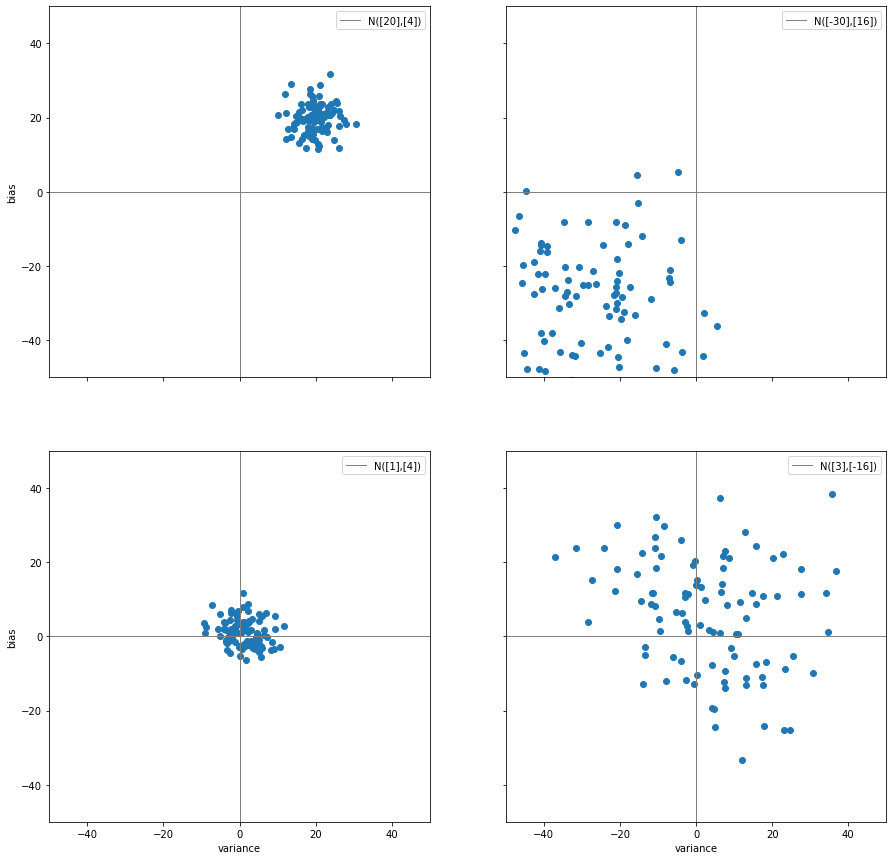

In [6]:
#가우시안 분포 2차원으로 그리기, + mean과 sigma의 관계 plot해보기
i=0

plt.figure(figsize  = (15,15))
ax1 = plt.subplot(2,2,1)
plt.xticks(visible=False)#공유하게 할 거임 
plt.xlim(-50,50)
plt.ylim(-50,50)
plt.axhline(0,color='gray', linestyle='-', linewidth=1)
plt.axvline(0, color='gray', linestyle='-', linewidth=1)
plt.legend([f'N({mean[i]},{std[i]})'])
plt.ylabel('bias')
plt.scatter(data[i][0],data[i][1])
i+=1



ax2=plt.subplot(2,2,2,sharex=ax1,sharey=ax1)#축을 공유함 
plt.xticks(visible=False)#공유하게 할 거임 
plt.yticks(visible=False)#공유하게 할 거임 
plt.axhline(0,color='gray', linestyle='-', linewidth=1)
plt.axvline(0, color='gray', linestyle='-', linewidth=1)
plt.legend([f'N({mean[i]},{std[i]})'])
plt.scatter(data[i][0],data[i][1])

i+=1

##################################

ax3=plt.subplot(2,2,3,sharex=ax1,sharey=ax1)
plt.ylabel('bias')

plt.xlabel('variance')
plt.axhline(0,color='gray', linestyle='-', linewidth=1)
plt.axvline(0, color='gray', linestyle='-', linewidth=1)
plt.legend([f'N({mean[i]},{std[i]})'])
plt.scatter(data[i][0],data[i][1])
i+=1

###################################

ax4=plt.subplot(2,2,4,sharex=ax1,sharey=ax1)
plt.xlabel('variance')
plt.yticks(visible=False)#공유하게 할 거임 
plt.axhline(0,color='gray', linestyle='-', linewidth=1)
plt.axvline(0, color='gray', linestyle='-', linewidth=1)
plt.legend([f'N({mean[i]},{std[i]})'])
plt.scatter(data[i][0],data[i][1])
i+=1

plt.show()

np.cov()가 
np.linalg.det = 0이면 singular matrix

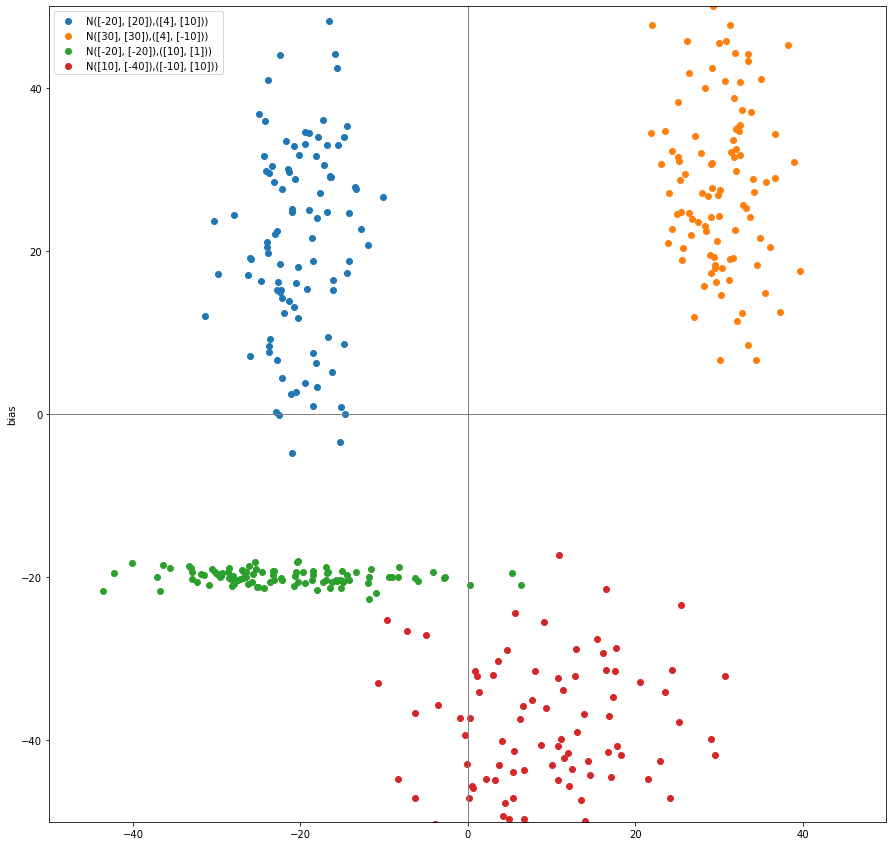

In [9]:
mean= [[[-20],[20]],[[30],[30]],[[-20],[-20]],[[10],[-40]]] #hi, hi, low,low
std = [[[4],[10]],[[4],[-10]],[[10],[1]],[[-10],[10]]] # low hi, low hi 
data  = np.zeros((4,2,100))
for i in range(4):
    for j in range(2):
        data[i][j] = std[i][j]*np.random.randn(100) + mean[i][j]
plt.figure(figsize  = (15,15))
# plt.xticks(visible=False)#공유하게 할 거임 
plt.xlim(-50,50)
plt.ylim(-50,50)
legend = [f'N{mean[i][0],mean[i][1]},{std[i][0],std[i][1]})'for i in range(4)]

plt.axhline(0,color='gray', linestyle='-', linewidth=1)
plt.axvline(0, color='gray', linestyle='-', linewidth=1)
# plt.legend([f'N({mean[i]},{std[i]})'])
plt.ylabel('bias')
for i in range(4):
    plt.scatter(data[i][0],data[i][1],label = legend[i])
# plt.legend(legend)
plt.legend()
plt.show()

4개의 multivariate 가우시안분포 
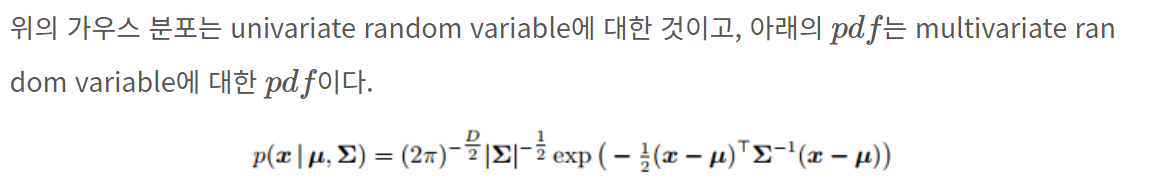

설명: + mean은 x축과 y축의 평균을 의미한다. variance는 2역시 x축과 y축의 분산이 서로 다른데 초록색 분포를 보면 x축의 분산은 10, y축의 분산은 1이라서 x축으로는 넓게 펴져있는 반면, y축은 펴지지 않음을 보이고 있다. 
+ 이를 matrix로 표현해보면 data가 row


https://data-science-hi.tistory.com/119
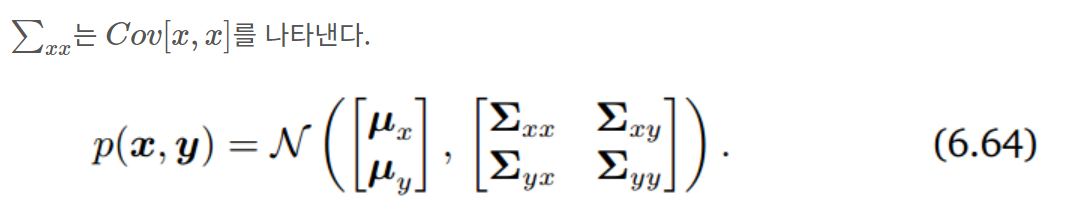

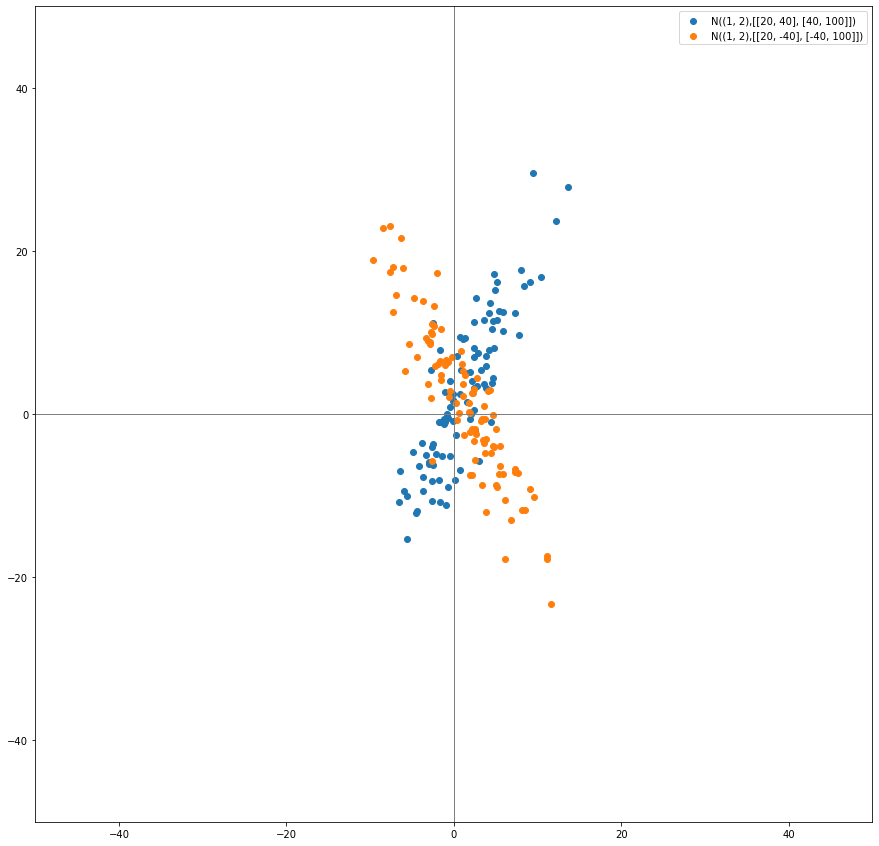

In [10]:
mean = (1, 2)
i=40
cov = [[[20, i], [i,100]],[[20, -i], [-i,100]]]
x,y = np.random.multivariate_normal(mean, cov[0], (1, 100)).T
x1,y1 = np.random.multivariate_normal(mean, cov[1], (1, 100)).T

# x = x.transpose(0,2,1) x만 썻을 때, 
plt.figure(figsize  = (15,15))
# plt.xticks(visible=False)#공유하게 할 거임 
plt.xlim(-50,50)
plt.ylim(-50,50)
# legend = [f'N{mean[i][0],mean[i][1]},{std[i][0],std[i][1]})'for i in range(4)]
# plt.scatter(x[0][0],x[0][1])
plt.scatter(x,y,label = f'N({mean},{cov[0]})')
plt.scatter(x1,y1,label =f'N({mean},{cov[1]})')
plt.legend()
plt.axhline(0,color='gray', linestyle='-', linewidth=1)
plt.axvline(0, color='gray', linestyle='-', linewidth=1)
plt.show()

In [11]:
np.random.randint(10)

0

In [12]:
cov = np.random.randint(-30,30,4*latent_var).reshape(3,2,-1) # mean을 임의로 설정합니다. 
cov

NameError: name 'latent_var' is not defined

data.shape: (300, 2)


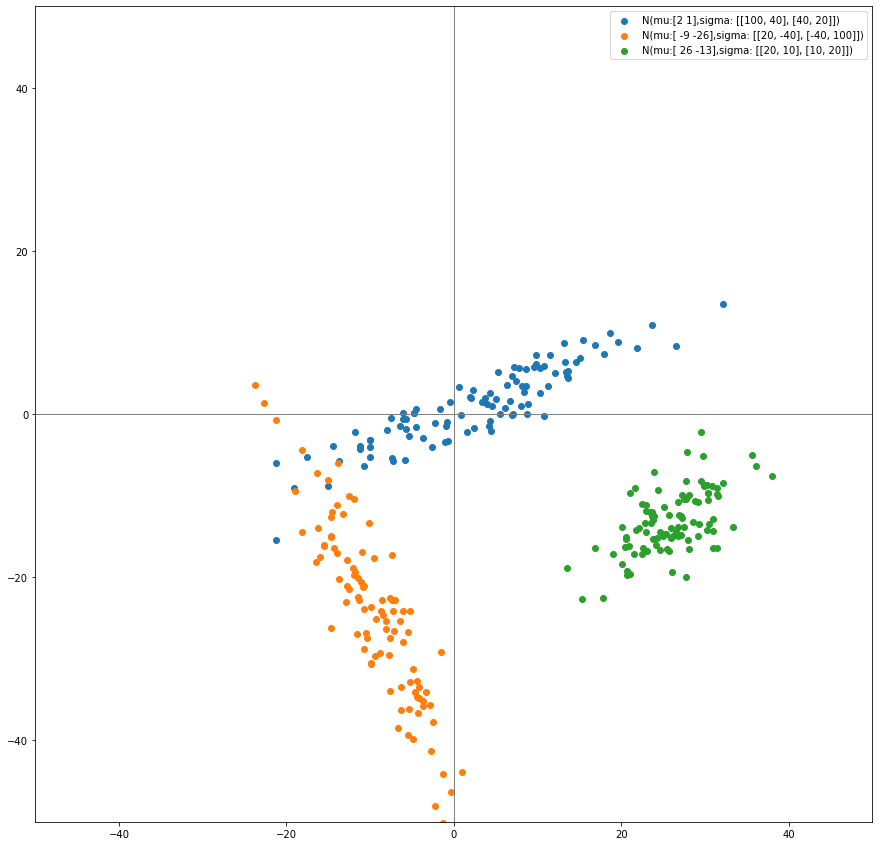

In [16]:
# EM_algorithm을 시행할 data 
latent_var = 3
mean = np.random.randint(-30,30,2*latent_var).reshape(3,-1) # mean을 임의로 설정합니다. 
i=40
j=10
cov = [[[100, i], [i,20]],[[20, -i], [-i,100]],[[20, j], [j,20]]]
# cov = np.random.randint(-30,30,4*latent_var).reshape(3,2,-1) # mean을 임의로 설정합니다. 
x1,y1 = np.random.multivariate_normal(mean[0], cov[0], (1, 100)).T
x2,y2 = np.random.multivariate_normal(mean[1], cov[1], (1, 100)).T
x3,y3 = np.random.multivariate_normal(mean[2], cov[2], (1, 100)).T
data = np.hstack((np.vstack((x1,x2,x3)),np.vstack((y1,y2,y3))))
print('data.shape:',data.shape)

# x = x.transpose(0,2,1) x만 썻을 때, 
plt.figure(figsize  = (15,15))
# plt.xticks(visible=False)#공유하게 할 거임 
plt.xlim(-50,50)
plt.ylim(-50,50)


# legend = [f'N{mean[i][0],mean[i][1]},{std[i][0],std[i][1]})'for i in range(4)]
# plt.scatter(x[0][0],x[0][1])
plt.scatter(x1,y1,label = f'N(mu:{mean[0]},sigma: {cov[0]})')
plt.scatter(x2,y2,label =f'N(mu:{mean[1]},sigma: {cov[1]})')
plt.scatter(x3,y3,label =f'N(mu:{mean[2]},sigma: {cov[2]})')
plt.legend()
plt.axhline(0,color='gray', linestyle='-', linewidth=1)
plt.axvline(0, color='gray', linestyle='-', linewidth=1)
plt.show()

In [17]:
# mean= [[[-20],[20]],[[30],[30]],[[-20],[-20]],[[10],[-40]]] #hi, hi, low,low
# std = [[[4],[10]],[[4],[-10]],[[10],[1]],[[-10],[10]]] # low hi, low hi 
# data  = np.zeros((4,2,100))
# for i in range(4):
#     for j in range(2):
#         data[i][j] = std[i][j]*np.random.randn(100) + mean[i][j]
# plt.figure(figsize  = (15,15))
# # plt.xticks(visible=False)#공유하게 할 거임 
# plt.xlim(-50,50)
# plt.ylim(-50,50)
# legend = [f'N{mean[i][0],mean[i][1]},{std[i][0],std[i][1]})'for i in range(4)]

# plt.axhline(0,color='gray', linestyle='-', linewidth=1)
# plt.axvline(0, color='gray', linestyle='-', linewidth=1)
# # plt.legend([f'N({mean[i]},{std[i]})'])
# plt.ylabel('bias')
# for i in range(4):
#     plt.scatter(data[i][0],data[i][1],label = legend[i])
# # plt.legend(legend)
# plt.legend()
# plt.show()

In [18]:
# def multivariative_dis(x,mu,sigma):
#     return (1/((np.sqrt(2*np.pi)**d)*np.sqrt(np.linalg.det(sigma))))* np.exp(-1/2* np.matmul((np.matmul(((x-mu).T,numpy.linalg.inv(sigma)),(x-mu)))))

model

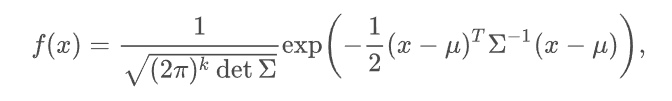

In [19]:
# estimate_mean

NameError: name 'estimate_mean' is not defined

In [37]:
estimate_mean =  np.random.randint(-30,30,2*latent_var).reshape(3,-1) # mean을 임의로 설정합니다. 

# i=40
# j=10
estimate_cov = [[[10, 0], [0,10]],[[100, -20], [-20,100]],[[20, 10], [10,20]]]


In [38]:
np.linalg.det(estimate_cov)

array([ 100., 9600.,  300.])

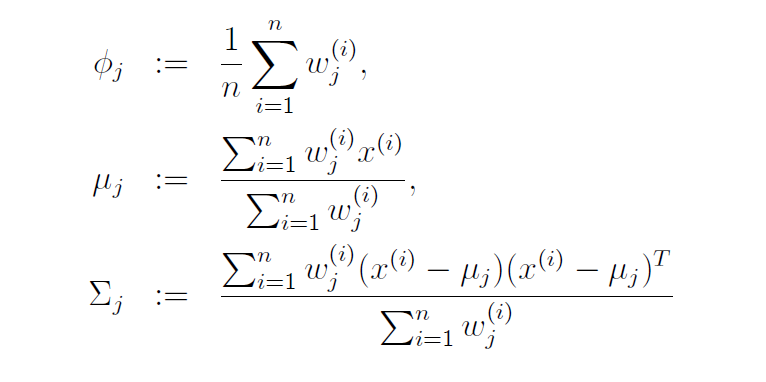

In [412]:
data.shape

(300, 2)

In [54]:
def pi(w,data):
    return np.sum(w,axis = 1)/len(data)

def mu(w,data):
    wsum = np.sum(w,axis=1)
    multiple = np.dot(w,data)
    mu = []
    for i in range(len(w)):
        mu.append(multiple[i]/wsum[i])
    return np.array(mu)

def sigma(w,data,n_mu):
    w_product = np.zeros((w.shape[0],data.shape[1],data.shape[1]))#크기 조정 
    for j in range(w.shape[0]):# latent_var만큼 반복 
        for i in range(len(data)):
            # print(data[i]-n_mu[j], data[i], n_mu[j], (data[i]-n_mu[j]).reshape(2,1).T) # shape이 정리되어있지 않아서 .T가 안되었었음 
            x = (data[i]-n_mu[j]).reshape(2,1) # 
            # print(x.shape, (x.T).shape)
            w_product[j]+= w[j][i]*np.dot(x,x.T) 
        w_product[j] = w_product[j]/np.sum(w[j])
    # print(w_product.shape)
    # re = np.sum(w_product,axis=1)/np.sum(w,axis=1).reshape(w.shape[0],1,1)
    return w_product

In [55]:
w = model(data,latent_var,phi,estimate_mean,estimate_sigma)
w.shape

NameError: name 'phi' is not defined

In [39]:
sigm = sigma(w,data,estimate_mean)
sigm

NameError: name 'w' is not defined

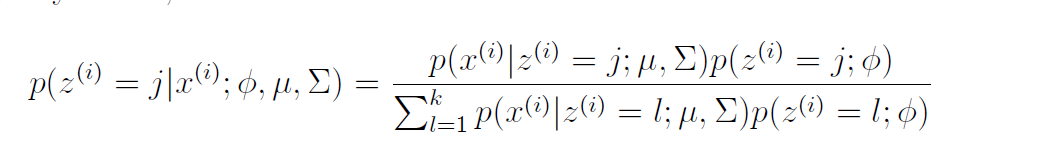

In [316]:
def model(data,latent_var,phi,mu,sigma):
    for i in range(latent_var):
        pdf[i] = multivariate_normal.pdf(data,mu[i],sigma[i])# pdf값을 계산 #3개 
    return pdf
w = model(data,latent_var,phi,estimate_mean,estimate_sigma)
w.shape
        # if phi.shape == (latent_var,):
#     phi = multivariate_normal.pdf(phi).reshape(latent_var,1)#reshape 해서 element_wise multiply 할거임 
# latent_pr = pdf*phi  # pdf값 곱하기 latent가 나올 확률 
# return latent_pr/np.sum(latent_pr,axis = 0)

(3, 300)

3 : latent_var ,   
300: data_sample number 

In [51]:
update = model(data,latent_var,estimate_pi,estimate_mean,estimate_cov)
np.sum(update,axis=0)
#보면 300개의 sample의 총합이 1 인것을 볼 수 있음 이게 무슨 것을 의미하냐면, 3개의 latent_var이 나올확률이 1인 것임

NameError: name 'pdf' is not defined

In [183]:
latent_var ,  data.shape

(3, (300, 2))

```python
def model(data,latent_var,phi,mu,sigma):
    for i in range(latent_var):
        pdf[i] = multivariate_normal.pdf(data,mu[i],sigma[i])#p(x(i)|z(i) = j;mu,sigma) 

    latent_pr = pdf*phi  #p(x(i)|z(i) = j;mu,sigma) * p(z(i) = j; phi)*p(z(i)=j; phi)
    return latent_pr/np.sum(latent_pr,axis = 0) # #p(x(i)|z(i) = j;mu,sigma) * p(z(i) = j; phi)*p(z(i)=j; phi) / sum(p(x(i) |z(i) =l ; mu, cov) p(z(i)=l;phi)
```

array([-30,  11])

In [41]:
estimate_phi =  np.random.random((0,1)) # mean을 임의로 설정합니다. 
estimate_phi

array([], shape=(0, 1), dtype=float64)

In [43]:
estimate_cov = [[[10, 0], [0,10]],[[100, -20], [-20,100]],[[20, 10], [10,20]]]
np.linalg.det(estimate_cov)

array([ 100., 9600.,  300.])

In [63]:
multivariate_normal.pdf(data,estimate_mean[0],estimate_cov[0]).shape

(300,)

In [64]:
data.shape

(300, 2)

In [70]:
data.shape

(300, 2)

In [71]:
pdf.shape

(3, 300, 2)

In [79]:
def model(data,latent_var,phi,mu,sigma):
    pdf = np.zeros((latent_var,data.shape[0]))
    
    for i in range(latent_var):
        pdf[i] = multivariate_normal.pdf(data,mu[i],sigma[i])# pdf값을 계산 #3개 
    if phi.shape == (latent_var,):
        phi = phi.reshape(latent_var,1)#reshape 해서 element_wise multiply 할거임 
    latent_pr = pdf*phi  # pdf값 곱하기 latent가 나올 확률 
    
    return latent_pr/np.sum(latent_pr,axis = 0)

data.shape: (300, 2)


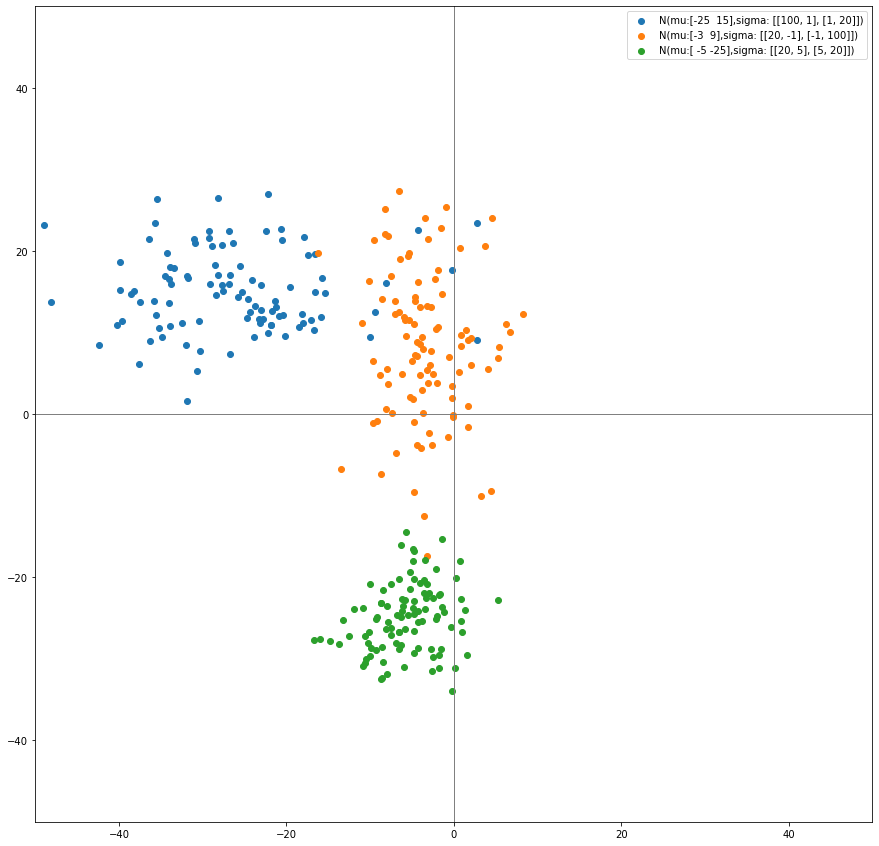

In [84]:
# EM_algorithm을 시행할 data 
mean = np.random.randint(-30,30,2*latent_var).reshape(3,-1) # mean을 임의로 설정합니다. 
i=1
j=5
cov = [[[100, i], [i,20]],[[20, -i], [-i,100]],[[20, j], [j,20]]]

# cov = np.random.randint(-30,30,4*latent_var).reshape(3,2,-1) # mean을 임의로 설정합니다. 

x1,y1 = np.random.multivariate_normal(mean[0], cov[0], (1, 100)).T
x2,y2 = np.random.multivariate_normal(mean[1], cov[1], (1, 100)).T
x3,y3 = np.random.multivariate_normal(mean[2], cov[2], (1, 100)).T
data = np.hstack((np.vstack((x1,x2,x3)),np.vstack((y1,y2,y3))))
print('data.shape:',data.shape)

# x = x.transpose(0,2,1) x만 썻을 때, 
plt.figure(figsize  = (15,15))
# plt.xticks(visible=False)#공유하게 할 거임 
plt.xlim(-50,50)
plt.ylim(-50,50)


# legend = [f'N{mean[i][0],mean[i][1]},{std[i][0],std[i][1]})'for i in range(4)]
# plt.scatter(x[0][0],x[0][1])
plt.scatter(x1,y1,label = f'N(mu:{mean[0]},sigma: {cov[0]})')
plt.scatter(x2,y2,label =f'N(mu:{mean[1]},sigma: {cov[1]})')
plt.scatter(x3,y3,label =f'N(mu:{mean[2]},sigma: {cov[2]})')
plt.legend()
plt.axhline(0,color='gray', linestyle='-', linewidth=1)
plt.axvline(0, color='gray', linestyle='-', linewidth=1)
plt.show()

In [46]:
np.cov(data.T)

array([[ 145.631392  , -141.66570623],
       [-141.66570623,  306.67956711]])

In [47]:
data.shape

(300, 2)

In [74]:
estimate_cov = np.array((np.cov(data.T),np.cov(data.T),np.cov(data.T)))

In [76]:
def plot(parameter,data):
    x1 = np.linspace(-50,50,data.shape[0])  
    x2 = np.linspace(-50,50,data.shape[0])
    X, Y = np.meshgrid(x1,x2) 
    mu1=parameter[0][0]
    mu2=parameter[0][1]
    mu3=parameter[0][2]
    s1=parameter[1][0]
    s2=parameter[1][1]
    s3=parameter[1][2]
    # print(np.linalg.det(s1))
    phi1 = multivariate_normal(mu1, s1)  
    phi2 = multivariate_normal(mu2, s2)
    phi3 = multivariate_normal(mu3, s3)

    pos = np.empty(X.shape + (2,))
    pos[:, :, 0] = X; pos[:, :, 1] = Y   

    plt.figure(figsize=(10,10))                                                         
    plt.scatter(data[:,0], data[:,1], marker='o')     
    plt.contour(X, Y, phi1.pdf(pos), colors="r" ,alpha = 0.5) #등고선 그림 
    plt.contour(X, Y, phi2.pdf(pos), colors="b" ,alpha = 0.5) 
    plt.contour(X, Y, phi3.pdf(pos), colors="y" ,alpha = 0.5) 
    plt.axis('equal')                                                                  
    # plt.xlabel('X-Axis', fontsize=16)                                                  
    # plt.ylabel('Y-Axis', fontsize=16)                                                  
    plt.grid()                                                                         
    plt.show()

[42171.33552955 42171.33552955 42171.33552955]
[[[ 149.88879899 -101.03486377]
  [-101.03486377  349.45492645]]

 [[ 149.88879899 -101.03486377]
  [-101.03486377  349.45492645]]

 [[ 149.88879899 -101.03486377]
  [-101.03486377  349.45492645]]]
[0.36525801 0.35365864 0.28108335]
[[-16.64586169   3.06021107]
 [-10.30864041  -5.51001397]
 [ -7.36040966   0.82513547]]


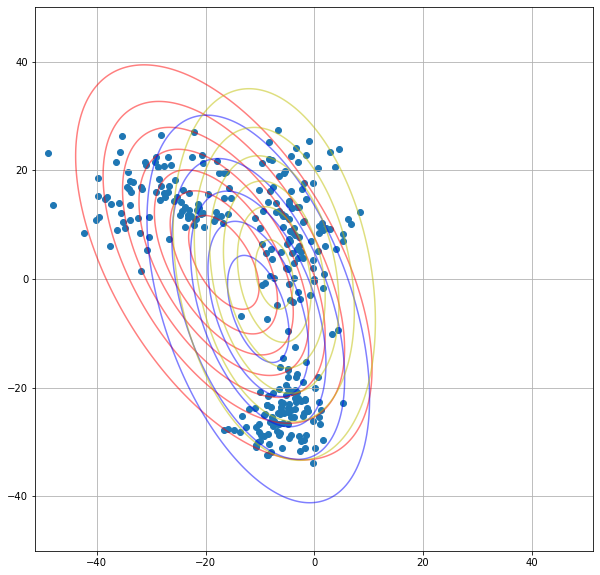

[0.36372794 0.34587132 0.29040074]
[[-18.47453004   4.61683467]
 [ -9.61216051  -6.89611056]
 [ -6.02749587   0.36821353]]


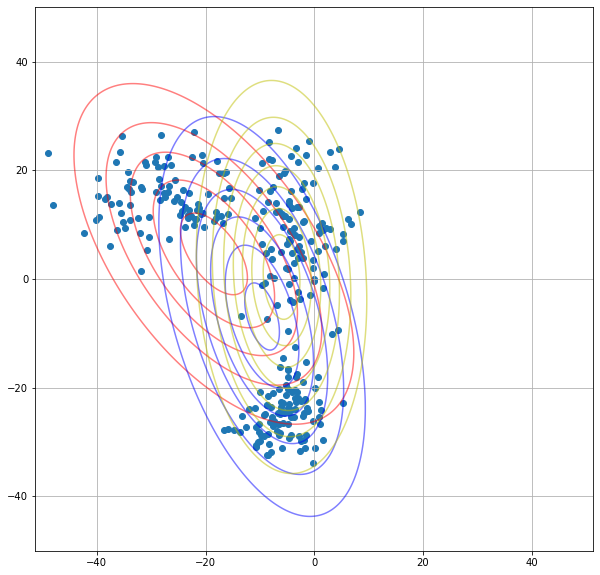

[0.35740227 0.32950026 0.31309747]
[[-20.90891402   7.22665722]
 [ -8.72658799  -8.89392634]
 [ -4.61950807  -0.80242826]]


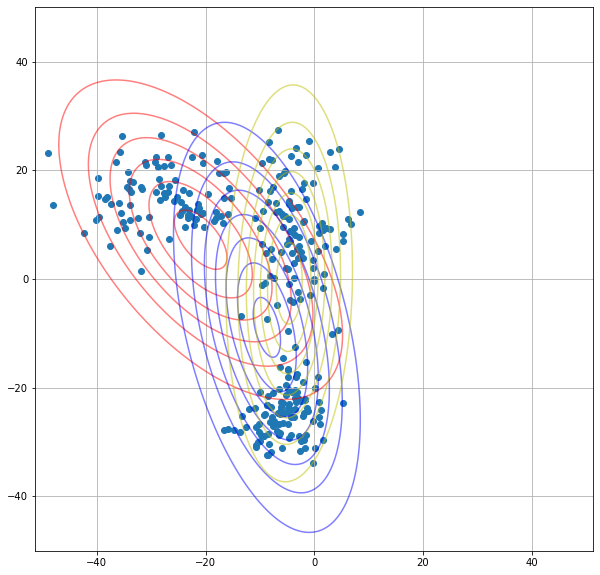

[0.34500075 0.29992914 0.35507011]
[[-23.42039859  10.57097903]
 [ -7.8168931  -11.31094421]
 [ -3.85865624  -2.40369309]]


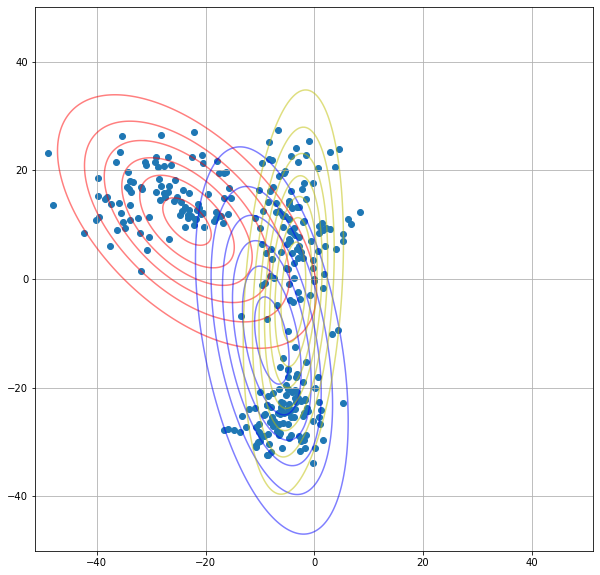

[0.33813144 0.26424915 0.39761941]
[[-25.18272987  13.54471033]
 [ -6.89238664 -13.86800946]
 [ -3.66753368  -3.80828569]]


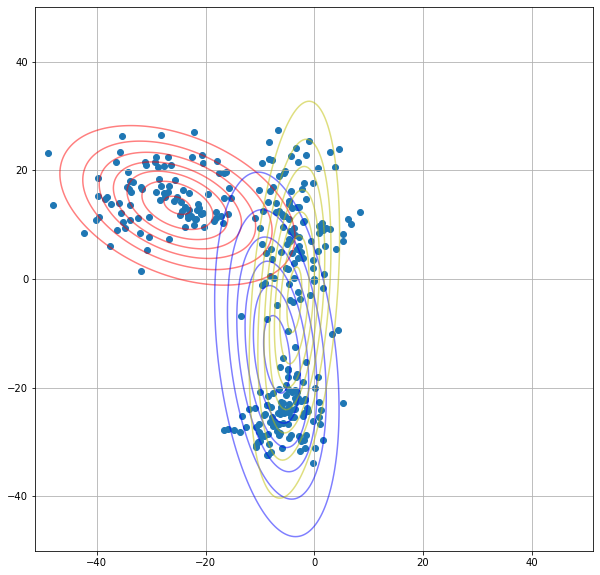

[0.34917626 0.23559305 0.41523069]
[[-25.35819783  14.54724793]
 [ -6.13042803 -16.06380945]
 [ -3.60256519  -4.5613138 ]]


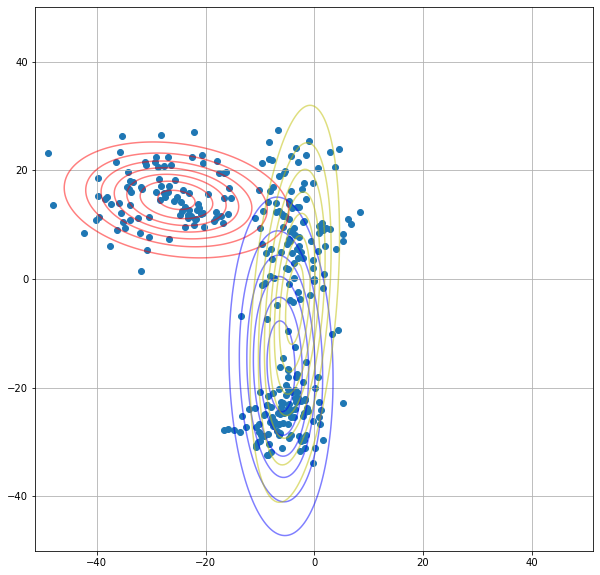

[0.35763937 0.22559322 0.4167674 ]
[[-25.14879442  14.86451214]
 [ -5.83599998 -17.57582348]
 [ -3.56050278  -4.67914169]]


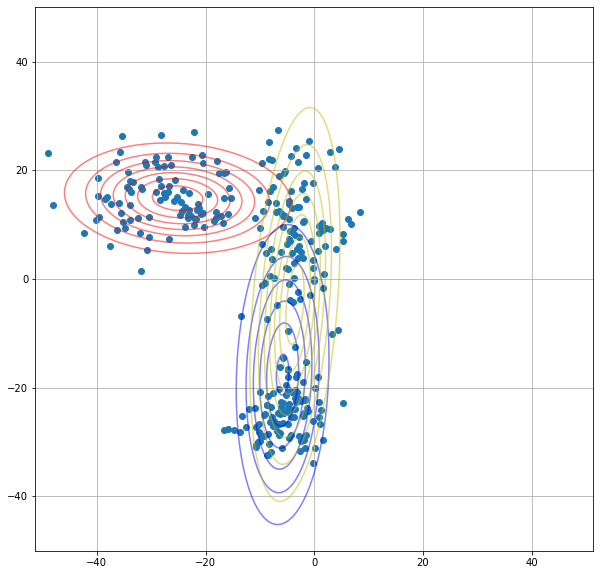

[0.36295348 0.22381011 0.41323641]
[[-24.92208978  14.99030424]
 [ -5.79580508 -19.12126686]
 [ -3.5135908   -4.25958572]]


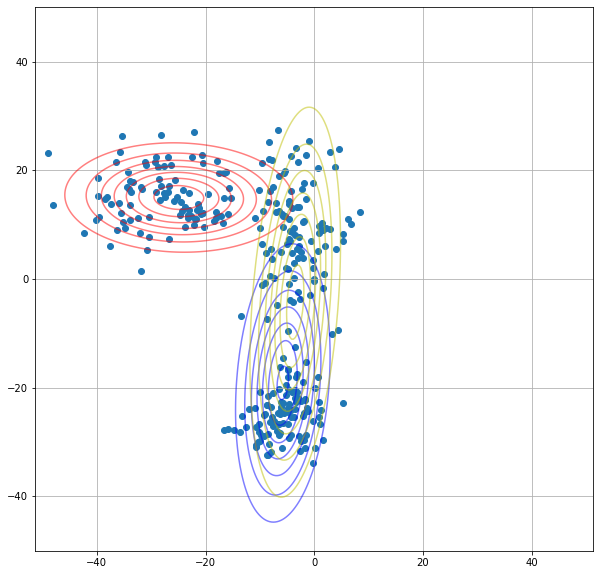

[0.3665925  0.22541094 0.40799656]
[[-24.73395114  15.02969994]
 [ -5.86581167 -21.04144242]
 [ -3.44405729  -3.34750268]]


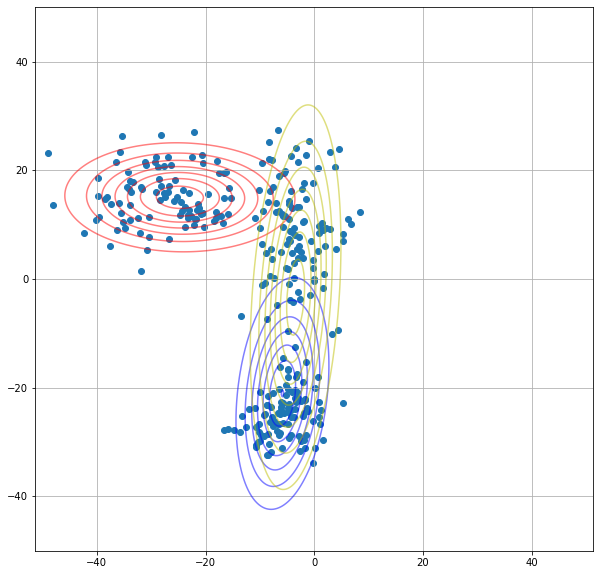

[0.36858455 0.23216661 0.39924884]
[[-24.61364611  15.02307183]
 [ -5.98891267 -23.20248931]
 [ -3.33633369  -1.8770114 ]]


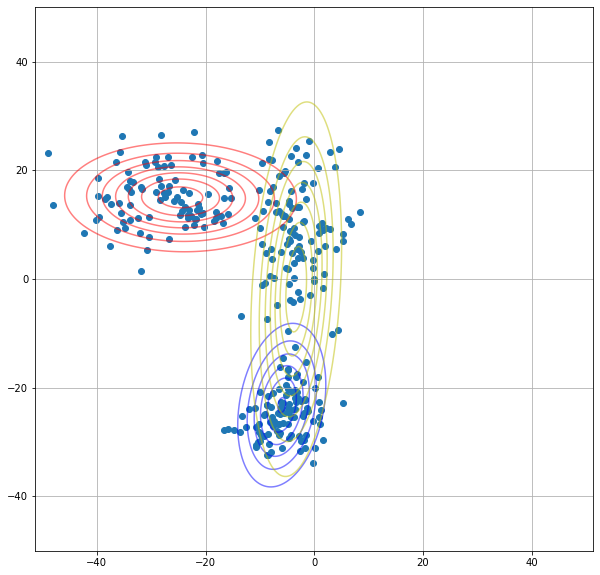

[0.36827274 0.25094033 0.38078693]
[[-24.61140273  15.00457766]
 [ -6.02972623 -24.81569126]
 [ -3.19825181   0.26921985]]


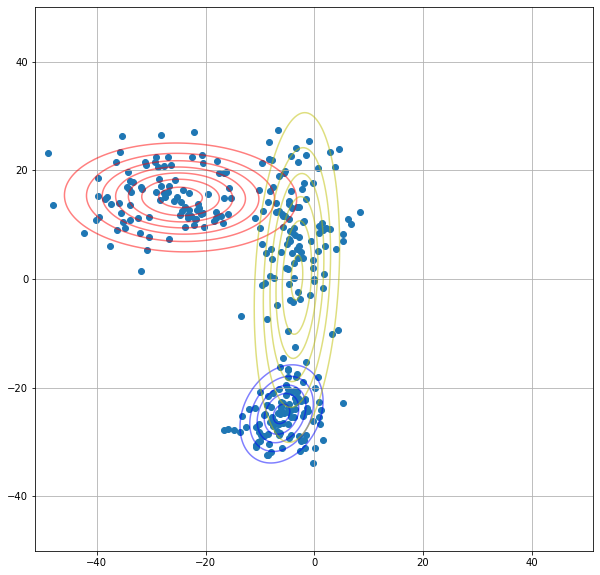

[0.36545002 0.27780834 0.35674164]
[[-24.75216323  14.99563202]
 [ -5.9724652  -25.33396827]
 [ -3.05482549   2.68784974]]


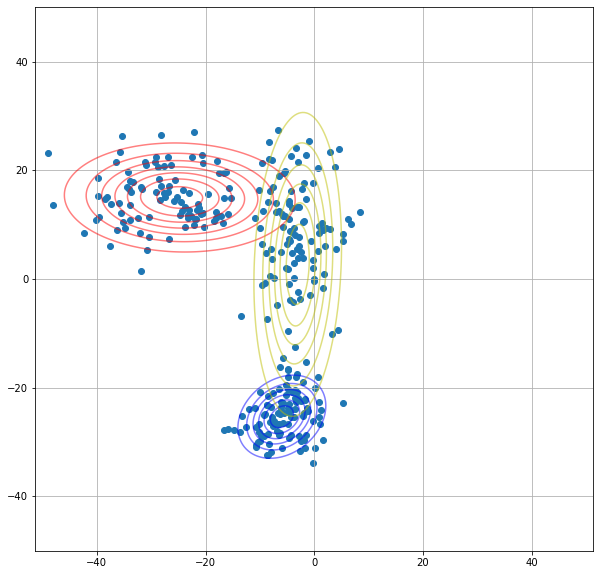

[0.36040663 0.29483212 0.34476125]
[[-25.02984221  15.00292151]
 [ -5.89780008 -25.47668374]
 [ -3.00173141   4.36599696]]


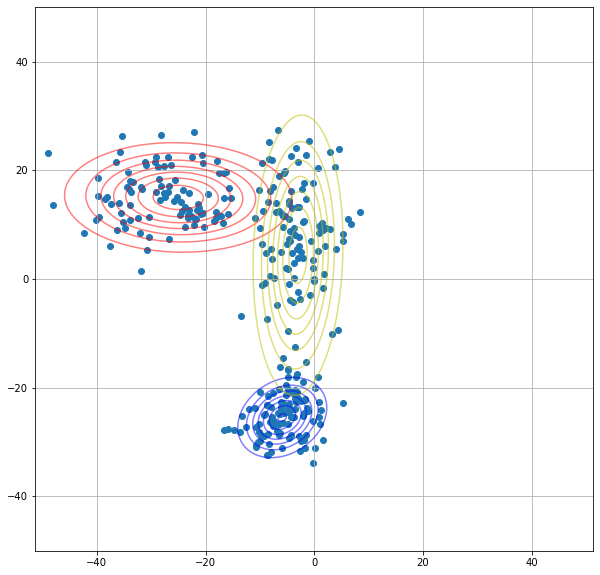

[0.35404669 0.30693038 0.33902293]
[[-25.3999      15.0268212 ]
 [ -5.81157668 -25.4639672 ]
 [ -3.00322674   5.59402693]]


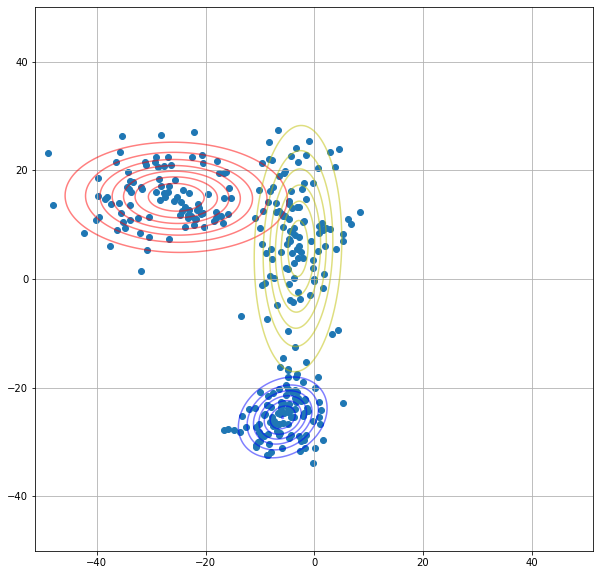

[0.34718994 0.31655096 0.33625911]
[[-25.81318131  15.05908512]
 [ -5.74245922 -25.36367812]
 [ -3.01792526   6.54723716]]


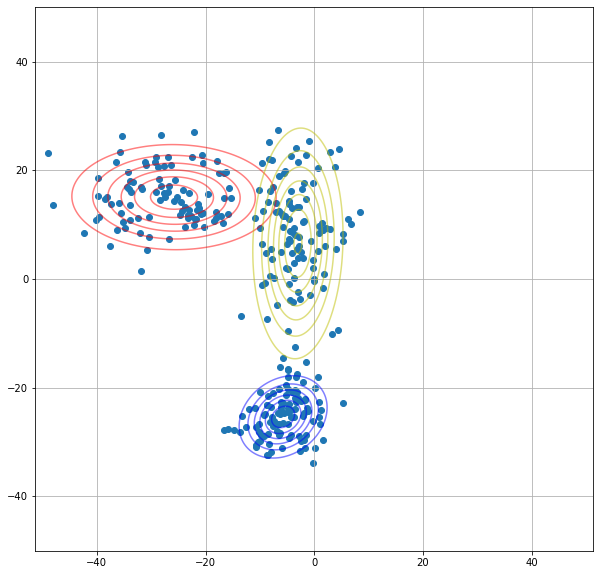

[0.34051197 0.32383107 0.33565696]
[[-26.22024661  15.08738966]
 [ -5.69704085 -25.23819441]
 [ -3.04321407   7.25892631]]


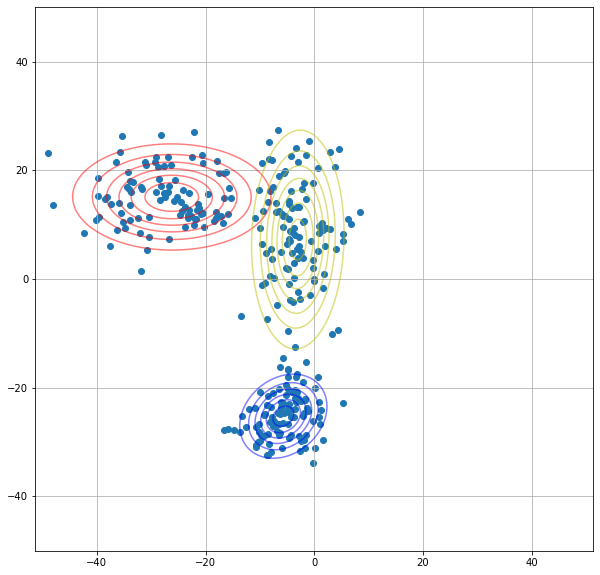

[0.33464136 0.32875498 0.33660366]
[[-26.57764585  15.10400193]
 [ -5.66959085 -25.13262157]
 [ -3.08011151   7.75120839]]


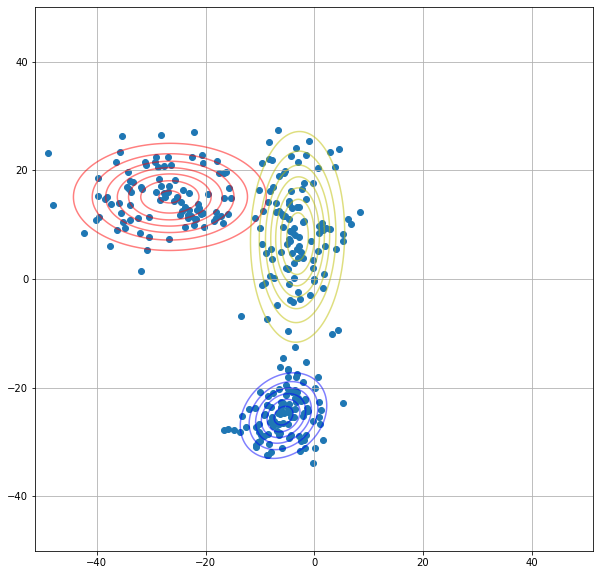

[0.32999386 0.33170911 0.33829703]
[[-26.85968234  15.10954913]
 [ -5.65386101 -25.06112991]
 [ -3.12061631   8.06386376]]


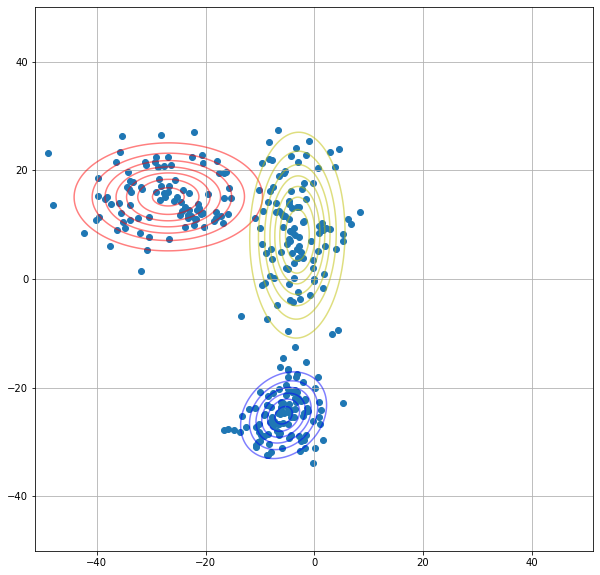

[0.32665242 0.33332867 0.34001891]
[[-27.06189671  15.10897023]
 [ -5.64515484 -25.01879206]
 [ -3.15610899   8.24993355]]


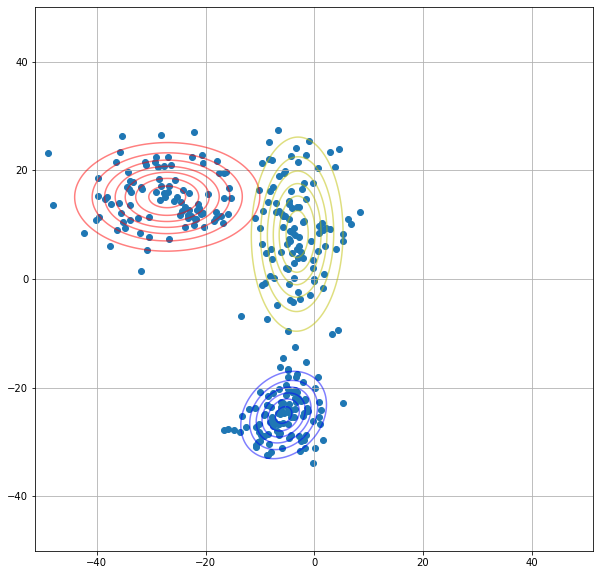

[0.32443446 0.33417536 0.34139018]
[[-27.19569437  15.10661358]
 [ -5.64045735 -24.99555436]
 [ -3.1826936    8.35649934]]


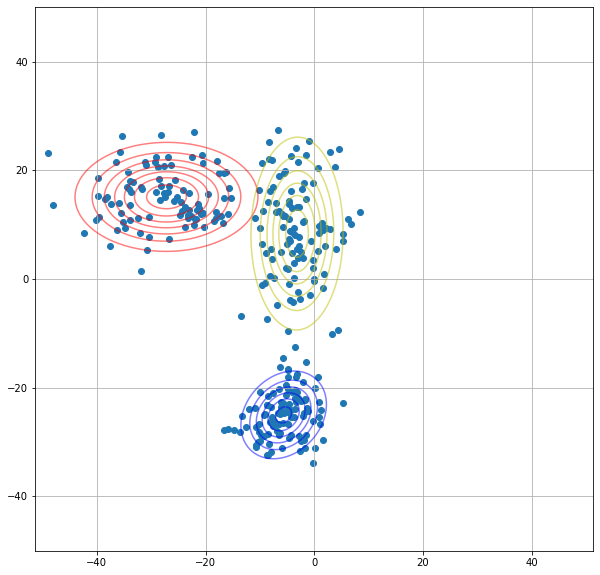

[0.32304876 0.33461121 0.34234003]
[[-27.2789721   15.10450553]
 [ -5.63797688 -24.98325081]
 [ -3.2006025    8.41624777]]


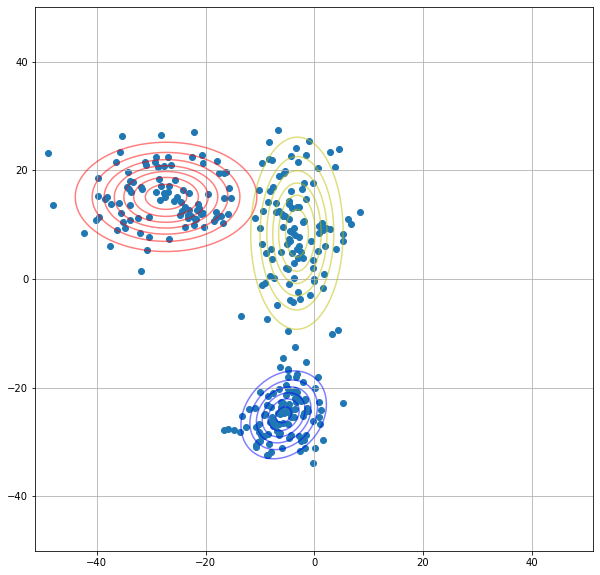

[0.32221892 0.334836   0.34294508]
[[-27.32865682  15.10308696]
 [ -5.63668272 -24.97681087]
 [ -3.21184981   8.44936864]]


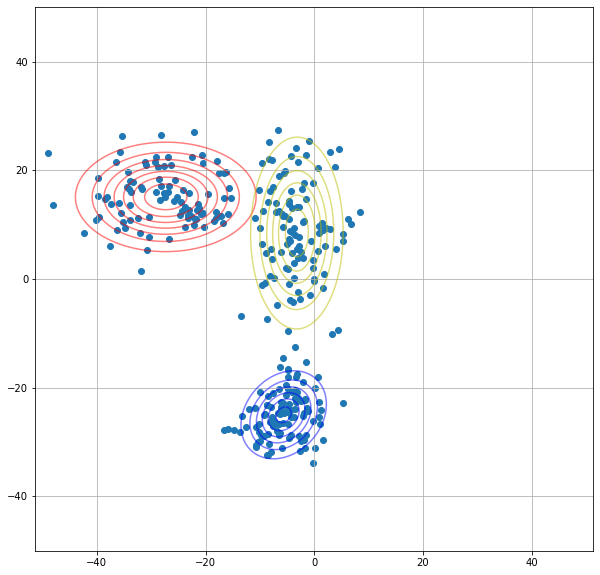

[0.32173557 0.334953   0.34331143]
[[-27.35750578  15.10223262]
 [ -5.63600835 -24.97343515]
 [ -3.21859933   8.46763496]]


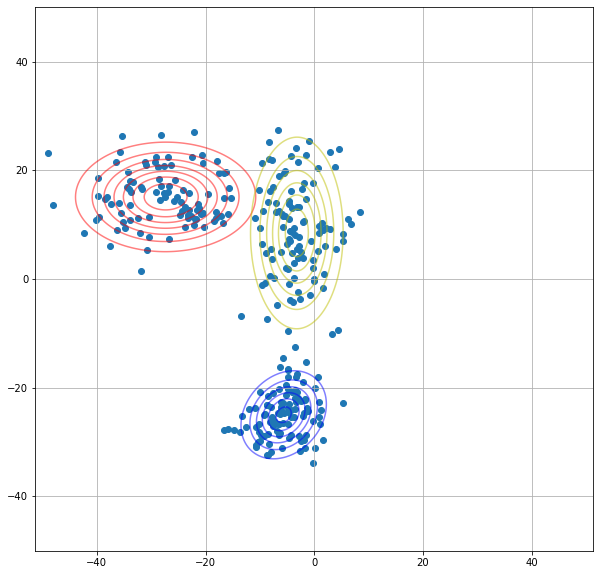

[0.3214589  0.33501457 0.34352654]
[[-27.373982    15.10174103]
 [ -5.63565493 -24.97165328]
 [ -3.22253441   8.47769446]]


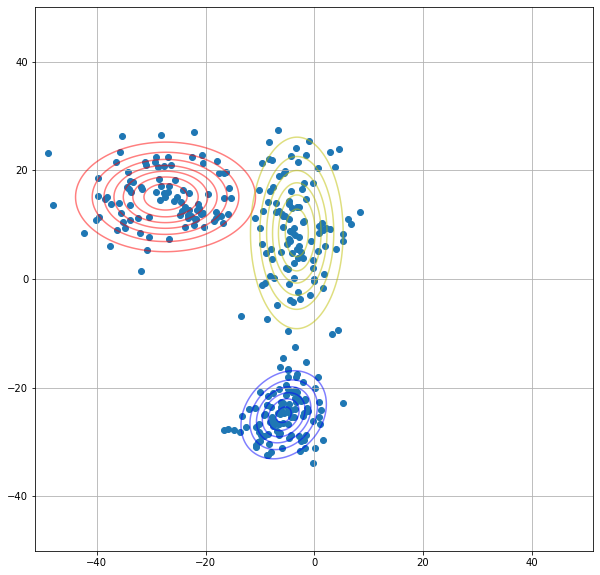

[0.32130219 0.33504731 0.34365051]
[[-27.38330017  15.10146318]
 [ -5.63546812 -24.97070481]
 [ -3.22478786   8.48323676]]


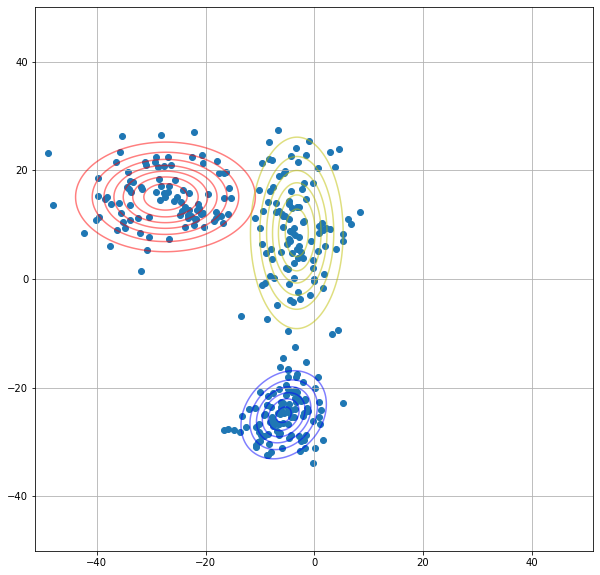

[0.32121399 0.33506487 0.34372114]
[[-27.38853985  15.10130717]
 [ -5.6353685  -24.97019592]
 [ -3.22606432   8.486294  ]]


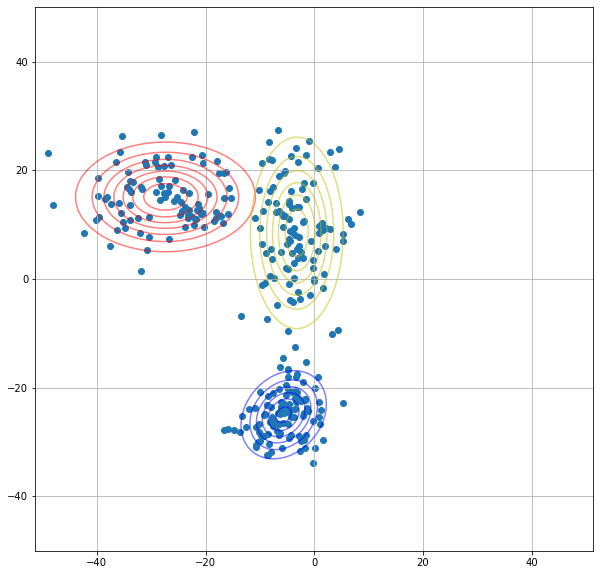

[0.32116454 0.33507436 0.34376111]
[[-27.39147619  15.10121977]
 [ -5.63531497 -24.96992101]
 [ -3.22678266   8.48798283]]


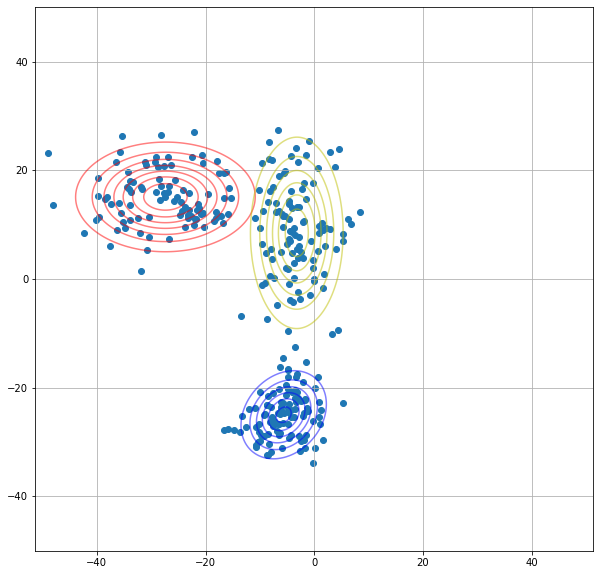

[0.32113687 0.33507951 0.34378362]
[[-27.39311842  15.10117086]
 [ -5.635286   -24.96977166]
 [ -3.22718535   8.48891703]]


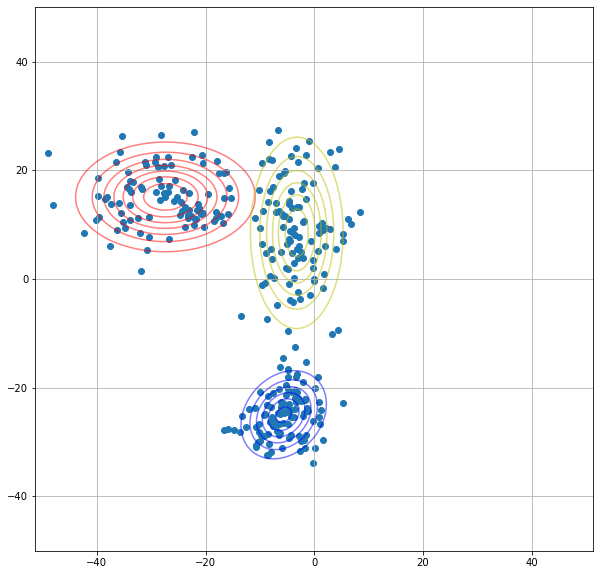

[0.32112141 0.33508233 0.34379626]
[[-27.39403574  15.1011435 ]
 [ -5.63527024 -24.96969013]
 [ -3.22741058   8.48943444]]


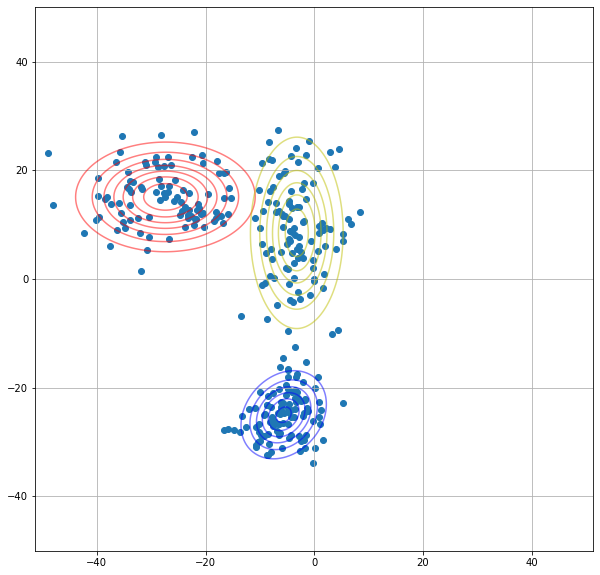

[0.32111279 0.33508387 0.34380334]
[[-27.39454776  15.1011282 ]
 [ -5.63526163 -24.96964546]
 [ -3.22753638   8.4897213 ]]


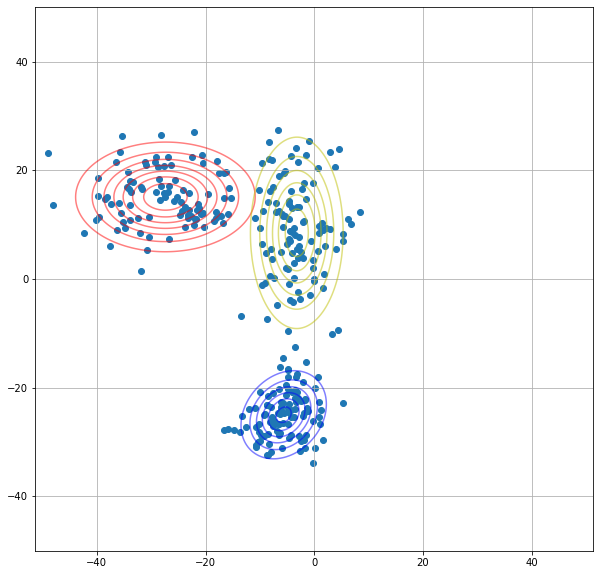

[0.32110797 0.33508472 0.34380731]
[[-27.3948334   15.10111966]
 [ -5.63525691 -24.9696209 ]
 [ -3.22760658   8.48988049]]


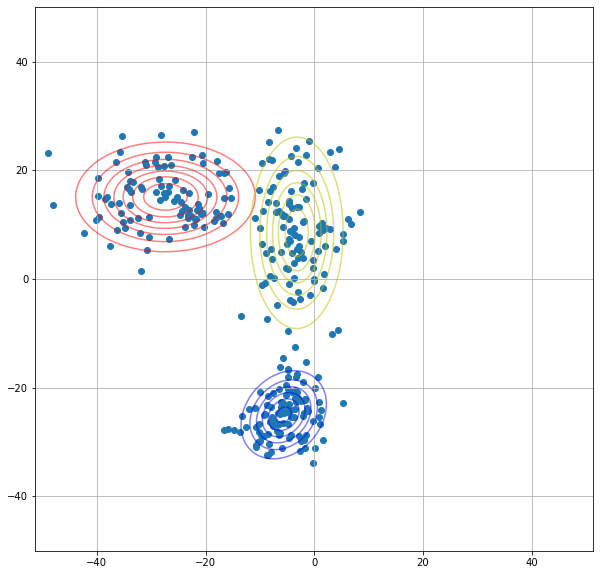

[0.32110529 0.33508519 0.34380952]
[[-27.39499271  15.10111488]
 [ -5.63525431 -24.96960738]
 [ -3.22764574   8.48996889]]


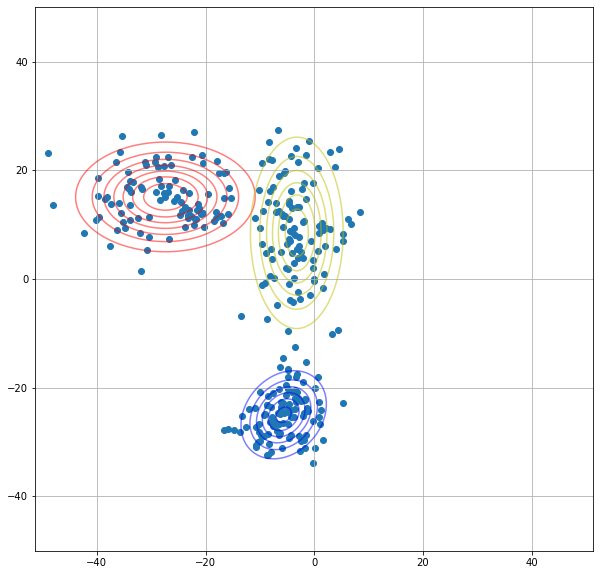

[0.32110379 0.33508545 0.34381076]
[[-27.39508153  15.10111222]
 [ -5.63525288 -24.96959991]
 [ -3.22766757   8.49001801]]


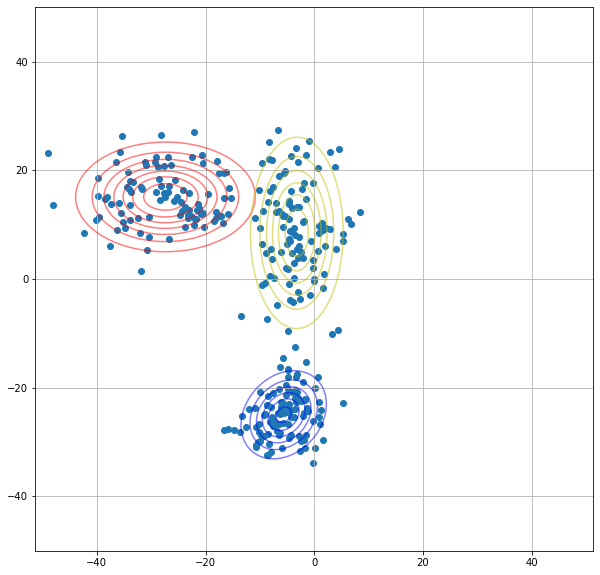

[0.32110296 0.33508559 0.34381145]
[[-27.39513105  15.10111073]
 [ -5.63525209 -24.96959578]
 [ -3.22767975   8.49004532]]


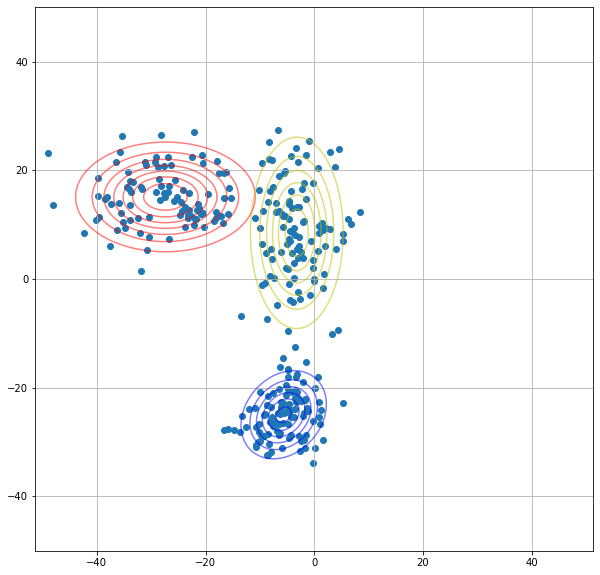

[0.32110249 0.33508567 0.34381184]
[[-27.39515865  15.1011099 ]
 [ -5.63525165 -24.96959349]
 [ -3.22768653   8.49006051]]


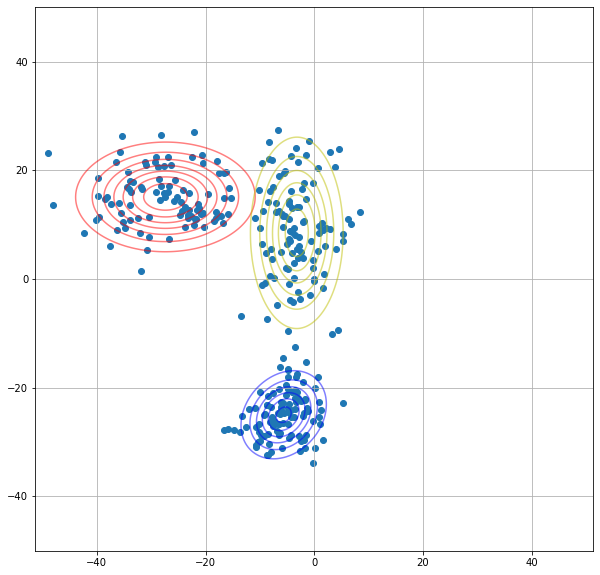

[0.32110223 0.33508571 0.34381205]
[[-27.39517404  15.10110944]
 [ -5.63525141 -24.96959222]
 [ -3.22769031   8.49006896]]


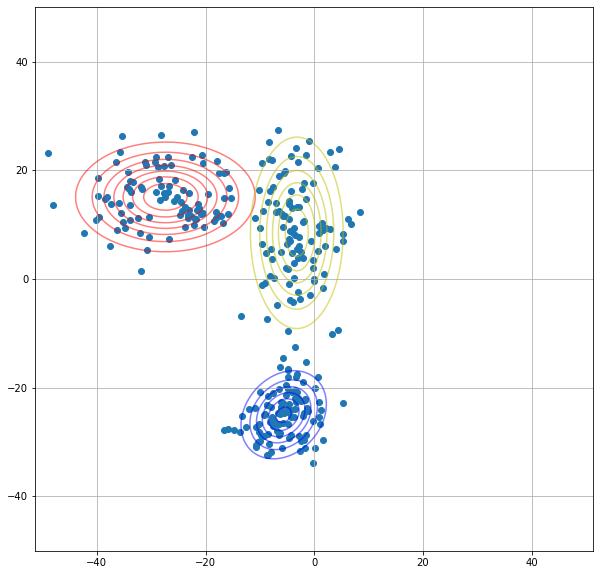

[0.32110209 0.33508574 0.34381217]
[[-27.39518261  15.10110918]
 [ -5.63525128 -24.96959151]
 [ -3.22769242   8.49007367]]


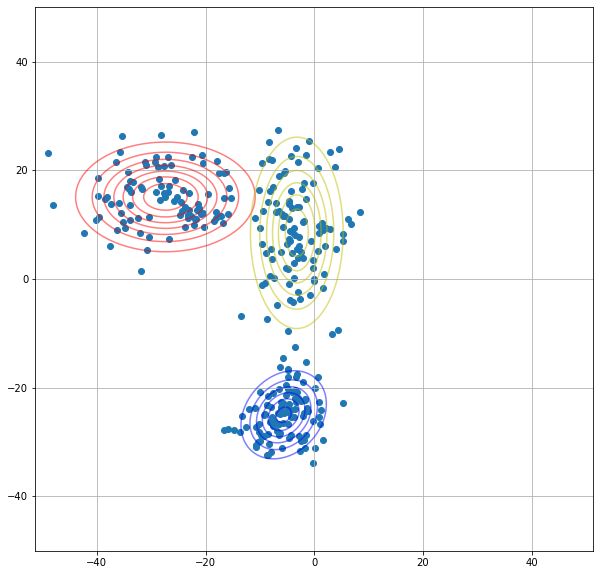

[0.32110201 0.33508575 0.34381224]
[[-27.39518739  15.10110904]
 [ -5.6352512  -24.96959112]
 [ -3.2276936    8.49007628]]


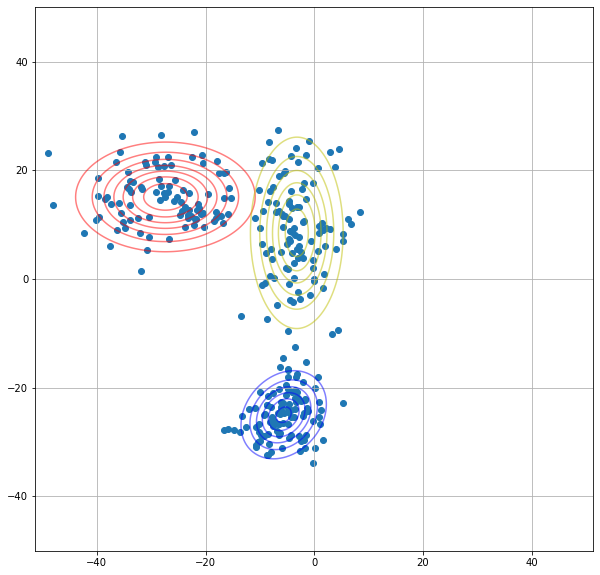

[0.32110196 0.33508576 0.34381228]
[[-27.39519005  15.10110895]
 [ -5.63525116 -24.96959091]
 [ -3.22769425   8.49007774]]


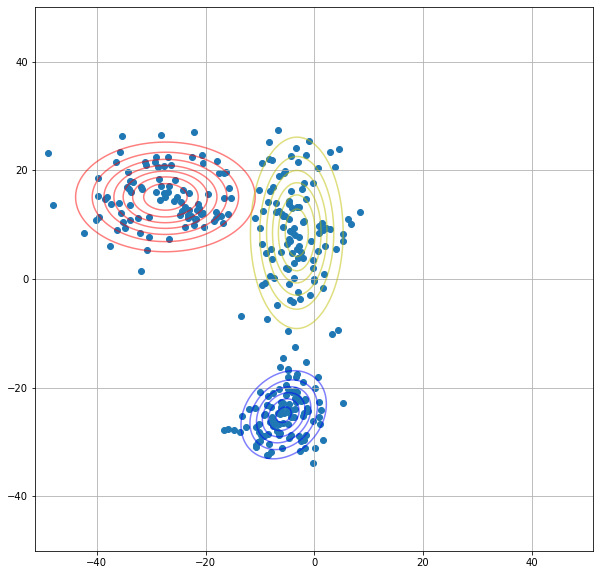

[0.32110194 0.33508576 0.3438123 ]
[[-27.39519154  15.10110891]
 [ -5.63525114 -24.96959079]
 [ -3.22769462   8.49007855]]


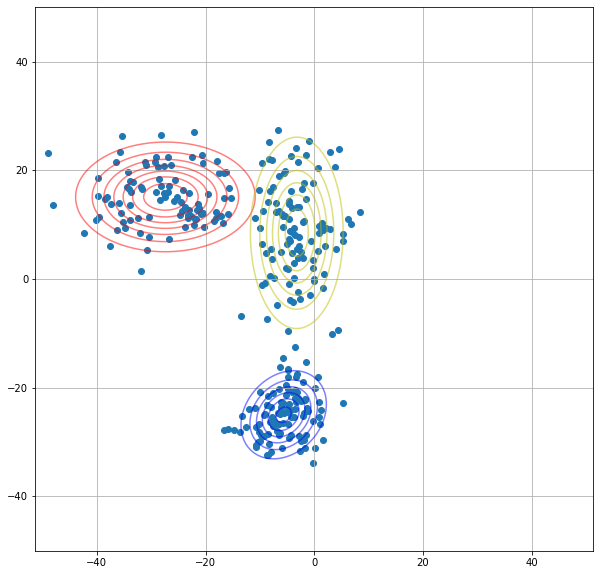

[0.32110192 0.33508576 0.34381231]
[[-27.39519236  15.10110889]
 [ -5.63525113 -24.96959072]
 [ -3.22769482   8.49007901]]


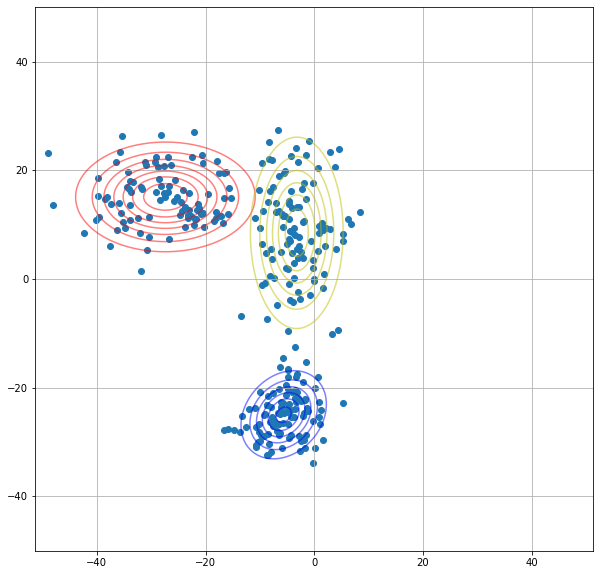

[0.32110192 0.33508577 0.34381232]
[[-27.39519283  15.10110887]
 [ -5.63525112 -24.96959068]
 [ -3.22769493   8.49007926]]


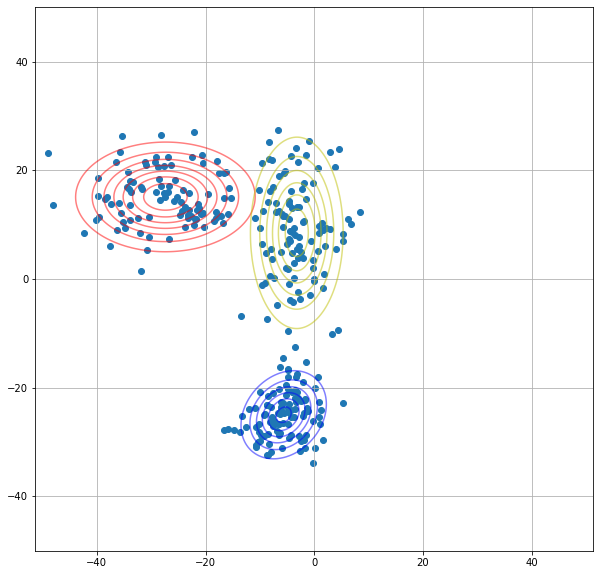

[0.32110191 0.33508577 0.34381232]
[[-27.39519308  15.10110886]
 [ -5.63525111 -24.96959066]
 [ -3.227695     8.4900794 ]]


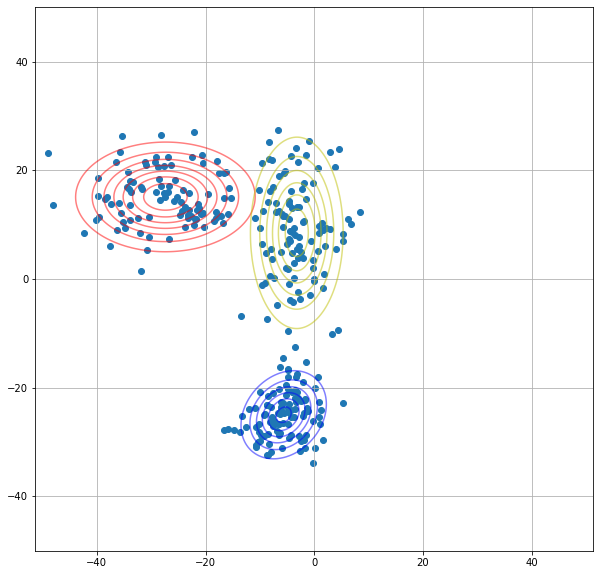

[0.32110191 0.33508577 0.34381232]
[[-27.39519322  15.10110886]
 [ -5.63525111 -24.96959065]
 [ -3.22769503   8.49007948]]


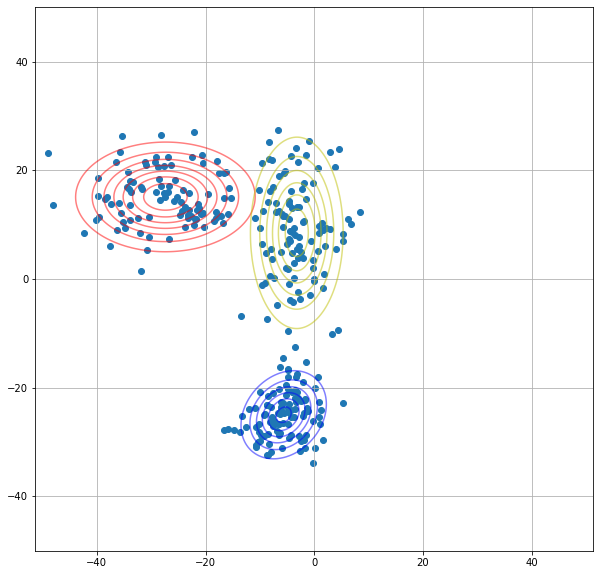

[0.32110191 0.33508577 0.34381232]
[[-27.3951933   15.10110886]
 [ -5.63525111 -24.96959064]
 [ -3.22769505   8.49007952]]


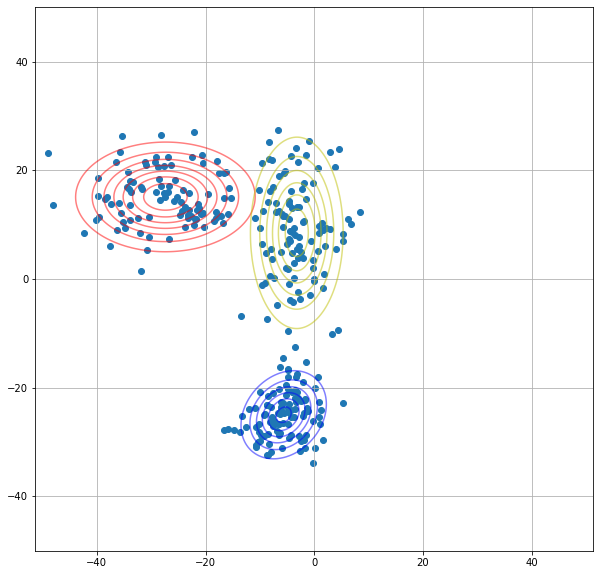

[0.32110191 0.33508577 0.34381232]
[[-27.39519335  15.10110886]
 [ -5.63525111 -24.96959064]
 [ -3.22769506   8.49007954]]


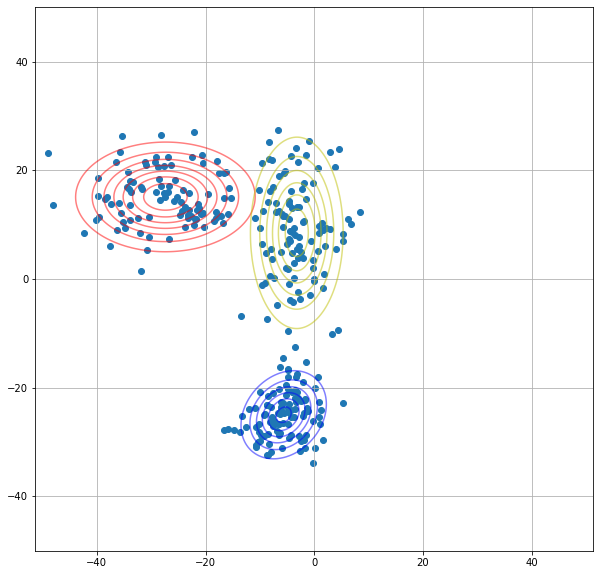

[0.32110191 0.33508577 0.34381233]
[[-27.39519337  15.10110885]
 [ -5.63525111 -24.96959064]
 [ -3.22769507   8.49007956]]


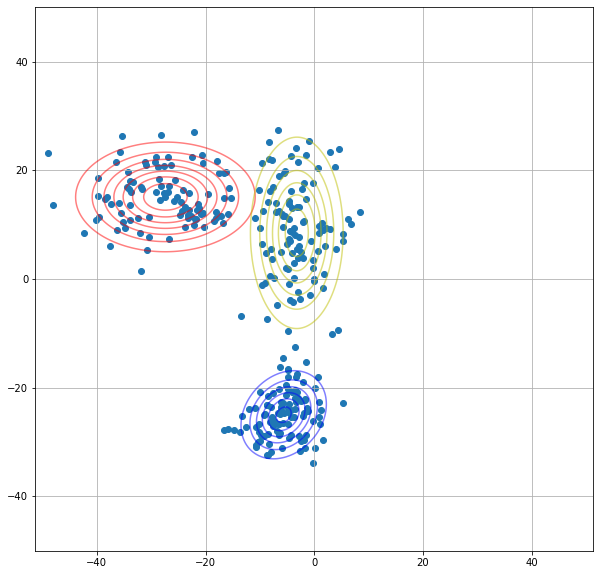

[0.32110191 0.33508577 0.34381233]
[[-27.39519339  15.10110885]
 [ -5.63525111 -24.96959064]
 [ -3.22769507   8.49007956]]


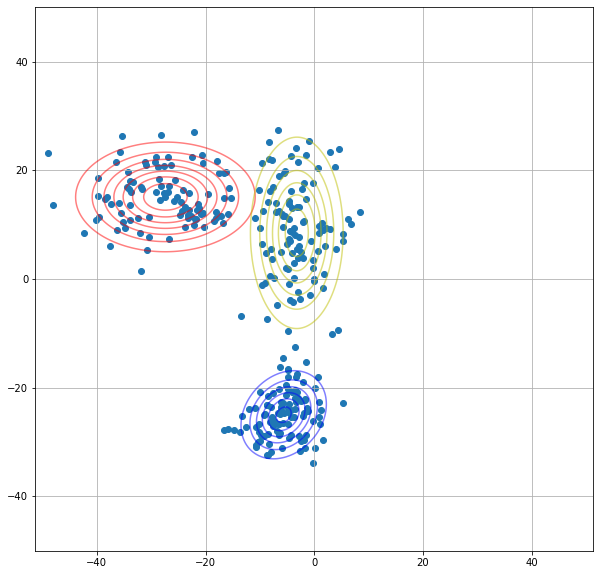

[0.32110191 0.33508577 0.34381233]
[[-27.3951934   15.10110885]
 [ -5.63525111 -24.96959063]
 [ -3.22769507   8.49007957]]


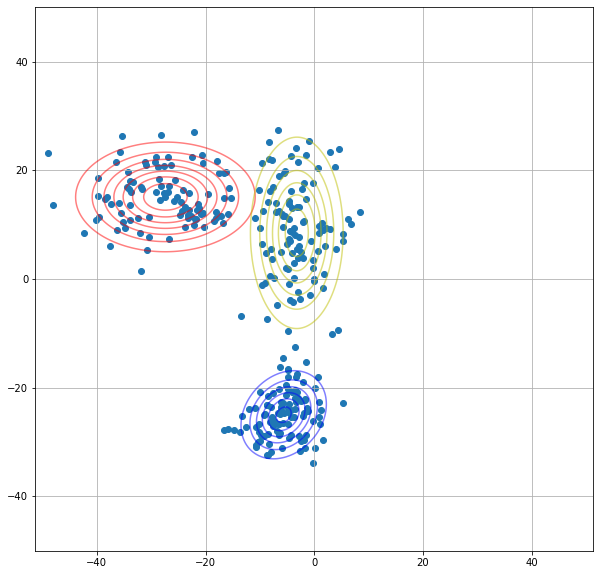

[0.32110191 0.33508577 0.34381233]
[[-27.3951934   15.10110885]
 [ -5.63525111 -24.96959063]
 [ -3.22769507   8.49007957]]


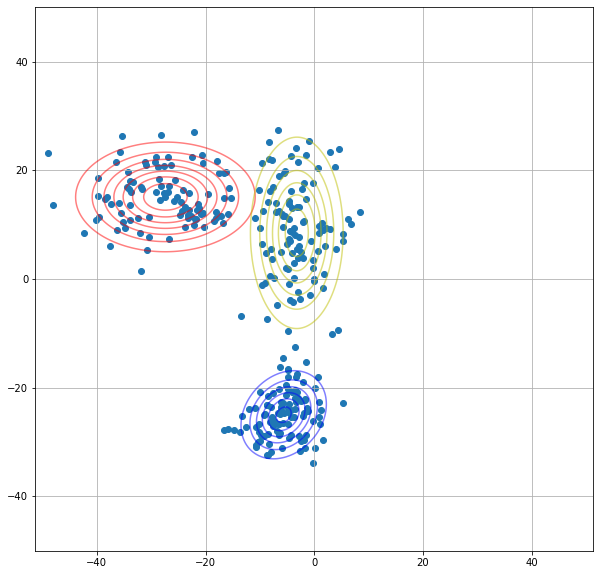

In [86]:
epochs = 50
latent_var = 3
estimate_pi = np.array([0.4,0.3,0.3])#ratent variable가 나올 확률
estimate_mean =  np.random.randint(-30,30,2*latent_var).reshape(3,-1) # mean을 임의로 설정합니다. 
# estimate_cov = [[[10, 0], [0,10]],[[100, -20], [-20,100]],[[20, 10], [10,20]]]
estimate_cov = np.zeros((3,2,2))
estimate_cov = np.array((np.cov(data.T),np.cov(data.T),np.cov(data.T)))
print(np.linalg.det(estimate_cov))
print(estimate_cov)

#초기 estimate_mean생성 
for i in range(epochs):
    # E step:
    
    w = model(data,latent_var,estimate_pi,estimate_mean,estimate_cov) # w 생성 
    # print(w)
    
    # M-step: 
    estimate_pi = pi(w,data)
    print(estimate_pi) 
    
    # print(estimate_pi)
    estimate_mean = mu(w,data)
    print(estimate_mean)    
    estimate_cov = sigma(w,data,estimate_mean)

    # print(w)
    plot([estimate_mean, estimate_cov],data)


In [207]:
xs, ys = np.meshgrid(x, y, sparse=True)
zs = np.sqrt(xs**2 + ys**2)
xs.shape, ys.shape, zs.shape
# ((1, 101), (101, 1), (101, 101))
np.array_equal(zz, zs)
# True

True

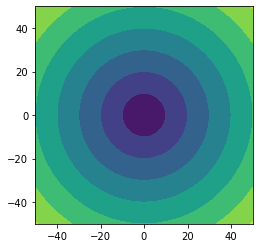

In [208]:
import matplotlib.pyplot as plt
h = plt.contourf(x, y, zs)
plt.axis('scaled')
# plt.colorbar()
plt.show()